## Experiment with Keras dropout layers

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

2024-05-06 07:42:31.147189: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 07:42:31.336877: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 07:42:31.337339: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 07:42:32.228798: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to have pixel values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# Define the original model architecture
original_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattens the input
    Dense(10, activation='softmax') # A softmax layer with 10 output units for each digit
])

# Compile the original model
original_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the original model
original_history = original_model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)

# Define the updated model architecture
updated_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattens the input
    Dense(128, activation='relu'),  # Dense layer with 128 neurons and ReLU activation
    Dropout(0.5),                   # Dropout layer with dropout rate of 0.5
    Dense(64, activation='relu'),   # Dense layer with 64 neurons and ReLU activation
    Dropout(0.5),                   # Dropout layer with dropout rate of 0.5
    Dense(10, activation='softmax') # A softmax layer with 10 output units for each digit
])

# Compile the updated model
updated_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the updated model
updated_history = updated_model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5


2024-05-06 07:45:19.439948: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1472/1500 [============================>.] - ETA: 0s - loss: 0.5124 - accuracy: 0.8656

2024-05-06 07:45:20.756901: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 [==============================] - 1s 825us/step - loss: 0.5099 - accuracy: 0.8663 - val_loss: 0.3166 - val_accuracy: 0.9133
Epoch 2/5
1500/1500 [==============================] - 1s 895us/step - loss: 0.3179 - accuracy: 0.9121 - val_loss: 0.2876 - val_accuracy: 0.9202
Epoch 3/5
1500/1500 [==============================] - 1s 718us/step - loss: 0.2935 - accuracy: 0.9180 - val_loss: 0.2767 - val_accuracy: 0.9240
Epoch 4/5
1500/1500 [==============================] - 1s 762us/step - loss: 0.2810 - accuracy: 0.9212 - val_loss: 0.2727 - val_accuracy: 0.9272
Epoch 5/5
1500/1500 [==============================] - 1s 710us/step - loss: 0.2739 - accuracy: 0.9231 - val_loss: 0.2669 - val_accuracy: 0.9269
Epoch 1/5


2024-05-06 07:45:26.039476: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 [==============================] - 3s 2ms/step - loss: 0.6457 - accuracy: 0.7998 - val_loss: 0.2032 - val_accuracy: 0.9413
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3535 - accuracy: 0.9017 - val_loss: 0.1677 - val_accuracy: 0.9517
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2942 - accuracy: 0.9190 - val_loss: 0.1343 - val_accuracy: 0.9612
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2632 - accuracy: 0.9259 - val_loss: 0.1308 - val_accuracy: 0.9628
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2372 - accuracy: 0.9348 - val_loss: 0.1253 - val_accuracy: 0.9628


313/313 [==============================] - 0s 626us/step - loss: 0.1231 - accuracy: 0.9640
Original Model - Test accuracy: 0.9248999953269958, Test loss: 0.2707895040512085
Updated Model - Test accuracy: 0.9639999866485596, Test loss: 0.12314749509096146


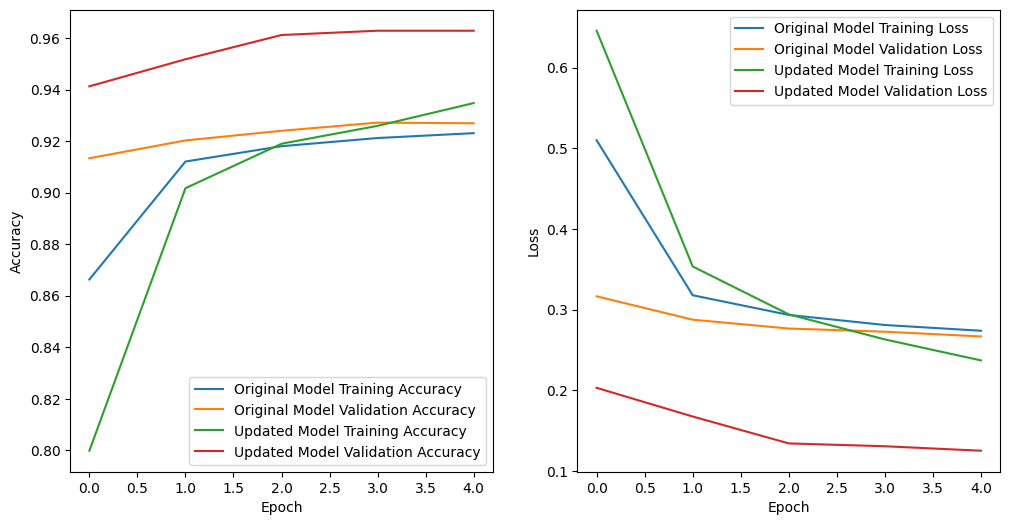

In [6]:
# Evaluate the original model
test_loss_original, test_acc_original = original_model.evaluate(test_images, test_labels)

# Evaluate the updated model
test_loss_updated, test_acc_updated = updated_model.evaluate(test_images, test_labels)

print(f'Original Model - Test accuracy: {test_acc_original}, Test loss: {test_loss_original}')
print(f'Updated Model - Test accuracy: {test_acc_updated}, Test loss: {test_loss_updated}')

# Plot training history for original and updated models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(original_history.history['accuracy'], label='Original Model Training Accuracy')
plt.plot(original_history.history['val_accuracy'], label='Original Model Validation Accuracy')
plt.plot(updated_history.history['accuracy'], label='Updated Model Training Accuracy')
plt.plot(updated_history.history['val_accuracy'], label='Updated Model Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(original_history.history['loss'], label='Original Model Training Loss')
plt.plot(original_history.history['val_loss'], label='Original Model Validation Loss')
plt.plot(updated_history.history['loss'], label='Updated Model Training Loss')
plt.plot(updated_history.history['val_loss'], label='Updated Model Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()